In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from rlx.ml import Batches

/opt/miniconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Exercise 1: Build a TF graph for Rosenbrock's function

the following function must implement Rosenbrock's function':

$$f(\mathbf{x})=\sum_{i=1}^{N-1} (x_i-x_{i-1}^2)^2 + (1-x_{i-1})^2$$

with $\mathbf{x}= [x_0, ..., x_{N-1}]$ 

Rosenbrock's function is used for training and benchmarking purposes. At any number of dimensions reaches its mininum at the unit vector.

your function must return:

- `x`: a list of $N$ TensorFlow variables
- `f`: a TensorFlow expression that uses these variables implementing Rosenbrock's equation

use `tf.reduce_sum`


In [ ]:
def get_f(N):
    tf.reset_default_graph()
    
    x = ...
    f = ...

    return x, f
    

In [ ]:
x, f = get_f(3)
vars

In [ ]:
f.graph.get_operations()

### observe the contour plot of the Rossenbrock function with $N=2$

Mesh size (40, 40)


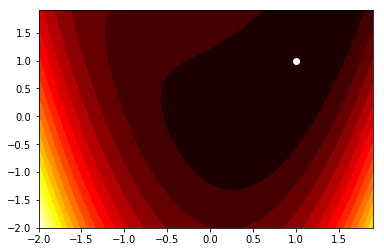

In [3]:
def py_rosenbrock(x):
    return sum((x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def plot_contour(f, x_points=None, y_points=None,  x_range=np.arange(-2, 2, .1), y_range=np.arange(-2, 2, .1),):
    X, Y = np.meshgrid(x_range, y_range)
    print "Mesh size", X.shape
    Z = np.array([[f(np.array([X[i,j], Y[i,j]])) for j in range(len(X[i]))] for i in range(len(X))])
    CS = plt.contourf(X, Y, Z, 20, cmap=plt.cm.hot)
    if x_points is not None:
        plt.scatter(x_points, y_points, c="white")
    return X, Y, Z

plot_contour(py_rosenbrock, x_points=[1], y_points=[1]);

## Exercise 2: Create a function to evaluate the previous expression

use `sess.run`

In [ ]:
def tf_eval(sess, f, x, x_vals):
    assert len(x)==len(x_vals), "must have the same number of values and variables"
    x_vals = x_vals.reshape(-1,1)
    
    result = ...
    
    return result

In [ ]:
x, f = get_f(2)
x_vals = np.random.random(2)*10
with tf.Session() as sess:
    print tf_eval(sess, f, x, x_vals)

check with Python implementation for $N=2$

In [ ]:
def py_rosenbrock(x):
    return sum((x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

py_rosenbrock(x_vals)

## Exercise 3: Create TF graphs for each partial derivative

the following function must return 

- `x`: a list of $N$ TensorFlow variables
- `f`: a TensorFlow expression that uses these variables implementing Rosenbrock's equation
- `df`: a list of $N$ TensorFlow expressions each one containing a partial derivative $\frac{\partial f}{\partial x_i}$

In [ ]:
def get_df(N):

    tf.reset_default_graph()
    
    x = ...
    f = ...

    df = ...
    
    return x, f, df
    

In [ ]:
x, f, df = get_df(3)

In [ ]:
print x
print df

## Exercise 4: Create function to evaluate gradients at any point

**input**:
- `sess`: a TF session
- `df`: a list of $N$ TF graphs representing the gradients
- `x`: a list of $N$ TF variables representing the differentiable variables
- `x_vals`: an `np.array` with the shape `(N)` with the point at which the gradient is to be evaluated

**output**:
- an `np.array` with the shape `(N)`

In [ ]:
def tfg_eval(sess, df, x, x_vals):
    assert len(x)==len(x_vals), "must have the same number of values and variables"
    
    x_vals = x_vals.reshape(-1,1)
    
    result = ...
    return result

In [ ]:
x, f, df = get_df(3)
x_vals = np.random.random(3)*10
with tf.Session() as sess:
    print tfg_eval(sess, df, x, x_vals)

## Exercise 5: Make a gradient descent to find minima

In [ ]:
def gd(N=2, x_init=None, step_size=0.1, max_steps=300, min_delta=1e-4):
    plot = N==2
    x, f, df = get_df(N)

    r = np.array(x_init).astype(np.float) if x_init is not None else np.random.random(size=N)*3-1.5
    r_list = [r.copy()]

    if plot:
        plot_contour(py_rosenbrock, x_points=[1], y_points=[1]);

    with tf.Session() as sess:

        for i in range(max_steps):
            
            # ---------------------------
            # YOUR CODE HERE
            # ---------------------------
            gradient = ... # add here computation of the gradient
            # ---------------------------
            
            delta    = gradient*step_size

            if np.linalg.norm(delta)<min_delta:
                break

            if plot:
                plt.arrow(r[0], r[1], -delta[0], -delta[1], head_width=0.05, head_length=0.1, fc='white', ec='white')

            r -= delta    # STUDENT
            r_list += [r.copy()]
    return r

In [ ]:
gd()